<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Polynomial_Linear_Regression_pada_data_sintetis_seed_ditampilkan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Regresi polinomial derajat 2 pada data sintetis nonlinier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#  Data sintetis (seed)
seed = 123
rng = np.random.RandomState(seed)
print("Random seed:", seed)

X = rng.uniform(-3, 3, size=(300, 1))
y_true = 3*X[:,0]**2 + 2*X[:,0] + 1
y = y_true + rng.normal(0, 2.0, size=X.shape[0])

Random seed: 123


In [4]:
#  Fitur polinomial + Linear Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

print(f"R^2: {r2_score(y, y_pred):.3f}")
print(f"RMSE: {mean_squared_error(y, y_pred)**0.5:.3f}")

R^2: 0.953
RMSE: 1.966


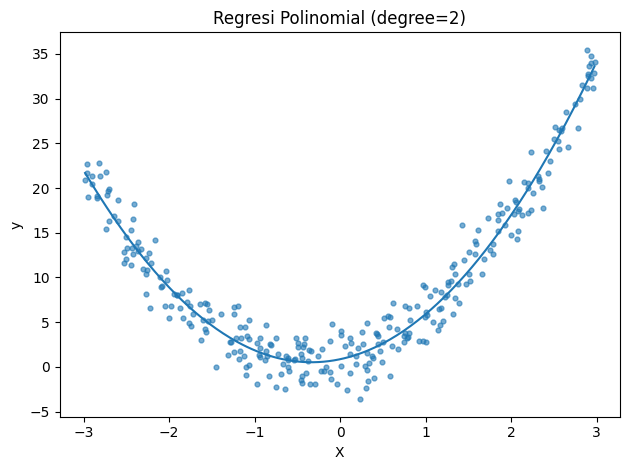

In [5]:
#  Grafik 1 — Scatter + kurva fit
plt.figure()
plt.scatter(X[:,0], y, s=12, alpha=0.6)
xs = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
ys = model.predict(poly.transform(xs))
plt.plot(xs[:,0], ys)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresi Polinomial (degree=2)")
plt.tight_layout()
plt.show()

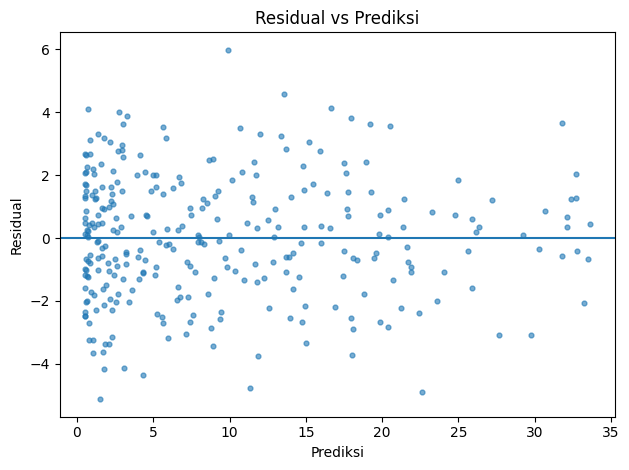

In [6]:
#  Grafik 2 — Residual vs Prediksi
residuals = y - y_pred
plt.figure()
plt.scatter(y_pred, residuals, s=12, alpha=0.6)
plt.axhline(0)
plt.xlabel("Prediksi")
plt.ylabel("Residual")
plt.title("Residual vs Prediksi")
plt.tight_layout()
plt.show()